## Glider Quick Look

S. Stalin

Puget Sound test

In [245]:
%matplotlib inline
import xarray as xa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
fp='/Users/bell/ecoraid/2019/Profilers/OculusGliders/PS_Spring_Test/sg401/p4010002.nc'

In [247]:
xdf = xa.open_dataset(fp)

In [248]:
#xdf.info

In [249]:
import seawater as sw

def O2PercentSat(oxygen_conc=None, temperature=None, salinity=None, pressure=0):
    """
    # calculate oxygen saturation
    # Garcia and Gorden 1992 - from Seabird Derived Parameter Formulas
    
    """

    coefs = {'GG_A0': 2.00907,
             'GG_A1': 3.22014,
             'GG_A2': 4.0501,
             'GG_A3': 4.94457,
             'GG_A4': -0.256847,
             'GG_A5': 3.88767,
             'GG_B0': -0.00624523,
             'GG_B1': -0.00737614,
             'GG_B2': -0.010341,
             'GG_B3': -0.00817083,
             'GG_C0': -0.000000488682}

    scaled_temp = np.log((298.15 - temperature)/(273.15 + temperature))

    Oxsol_pri = np.exp(coefs['GG_A0'] + coefs['GG_A1'] * scaled_temp + coefs['GG_A2'] * (scaled_temp) ** 2 + \
                coefs['GG_A3'] * (scaled_temp) ** 3 + coefs['GG_A4'] * (scaled_temp) ** 4 + \
                coefs['GG_A5'] * (scaled_temp) ** 5 + salinity * (coefs['GG_B0'] + coefs['GG_B1'] * scaled_temp +\
                coefs['GG_B2'] * (scaled_temp) ** 2 + coefs['GG_B3'] * (scaled_temp) ** 3) + coefs['GG_C0'] * (salinity) ** 2)

    #determine sigmatheta and convert Oxygen from micromoles/kg to ml/l
    #calculate new oxygen saturation percent using derived oxsol
    sigmatheta_pri = sw.eos80.pden(salinity, temperature, pressure)
    OxPerSat_pri = ( (oxygen_conc * sigmatheta_pri / 44660) / Oxsol_pri ) * 100.
         
    #replace nan/1e35 with 1e35, >1e10
    try:
        OxPerSat_pri[oxygen_conc >= 1e30] = np.nan
    except:
        if OxPerSat_pri >= 1e30:
            OxPerSat_pri = np.nan
            
    
    return OxPerSat_pri

In [250]:
OxyPSAT_calc = O2PercentSat(xdf.aanderaa4330_instrument_dissolved_oxygen,xdf.temperature.mean(),xdf.salinity.mean(),pressure=xdf.depth.mean())

## Quick Plots

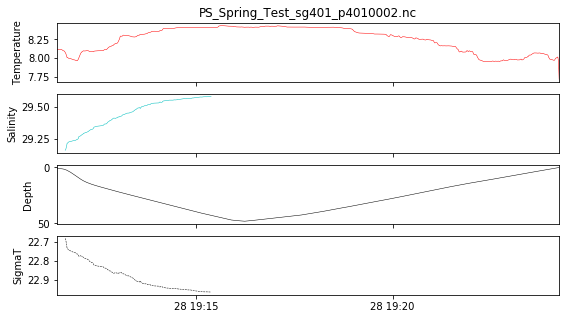

In [261]:
fig = plt.figure(1,figsize=(9,5))
### CTD Temperature
ax1 = plt.subplot(4, 1, 1)
plt.plot(xdf.ctd_time,xdf.temperature,'r',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_xticklabels([])
plt.title("_".join(fp.split('/')[-3:]))
ax1.set_ylabel('Temperature')

### CTD Salinity
ax1 = plt.subplot(4, 1, 2)
plt.plot(xdf.ctd_time,xdf.salinity,'c',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_xticklabels([])
ax1.set_ylabel('Salinity')
### CTD Depth
ax1 = plt.subplot(4, 1, 3)
plt.plot(xdf.ctd_time,xdf.ctd_depth,'k',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.set_ylabel('Depth')
### CTD Density
ax1 = plt.subplot(4, 1, 4)
plt.plot(xdf.ctd_time,xdf.sigma_t,'k--',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.invert_yaxis()
ax1.set_ylabel('SigmaT')

fig.savefig("_".join(fp.split('/')[-3:]).replace('.nc','_TSSeries.png'))

AttributeError: 'Dataset' object has no attribute 'wlbb2fl_FL1sig'

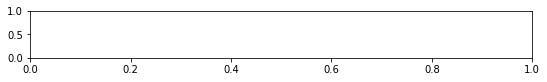

In [252]:
fig = plt.figure(1,figsize=(9,5))
### Wetlabs wlbb2fl_FL1sig
ax1 = plt.subplot(5, 1, 1)
plt.plot(xdf.wlbb2fl_time,xdf.wlbb2fl_FL1sig,'g',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_xticklabels([])
plt.title("_".join(fp.split('/')[-3:]))
ax1.set_ylabel('Wetlabs FL1 Signal')
### Wetlabs wlbb2fl_BB1sig
ax1 = plt.subplot(5, 1, 2)
plt.plot(xdf.wlbb2fl_time,xdf.wlbb2fl_BB1sig,'k--',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_xticklabels([])
ax1.set_ylabel('Wetlabs BB1 Signal')
### Wetlabs wlbb2fl_BB2sig
ax1 = plt.subplot(5, 1, 3)
plt.plot(xdf.wlbb2fl_time,xdf.wlbb2fl_BB2sig,'k',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_ylabel('Wetlabs BB2 Signal')
ax1.set_xticklabels([])
### Wetlabs wlbb2fl_temp
ax1 = plt.subplot(5, 1, 4)
plt.plot(xdf.wlbb2fl_time,xdf.wlbb2fl_temp,'r',linewidth=.5)
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_ylabel('Wetlabs Temp Signal')

fig.savefig("_".join(fp.split('/')[-3:]).replace('.nc','_wetlabsSeries.png'))

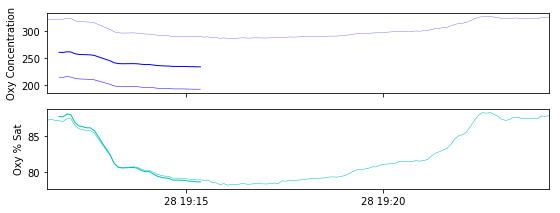

In [260]:
fig = plt.figure(1,figsize=(9,5))
### Aandera DO - sal corrected? (two versions plotted)
ax1 = plt.subplot(3, 1, 1)
plt.plot(xdf.aa4330_time,xdf.aanderaa4330_dissolved_oxygen,'b',linewidth=.5) #instrument adjusted?
plt.plot(xdf.aa4330_time,xdf.aanderaa4330_instrument_dissolved_oxygen,'b',linewidth=1) #instrument adjusted and salinity corrected
plt.plot(xdf.aa4330_time,xdf.aa4330_O2,'b-',linewidth=.25) #raw off instrument
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_xticklabels([])
ax1.set_ylabel('Oxy Concentration')
### Aandera % Sat - no salinity correction
ax1 = plt.subplot(3, 1, 2)
plt.plot(xdf.aa4330_time,xdf.aa4330_airsat,'c',linewidth=.5) #raw off instrument
plt.plot(xdf.aa4330_time,OxyPSAT_calc,'c',linewidth=1) #calculated from corrected conc but bulk/mean temp/sal
ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_ylabel('Oxy % Sat')

fig.savefig("_".join(fp.split('/')[-3:]).replace('.nc','_oxySeries.png'))

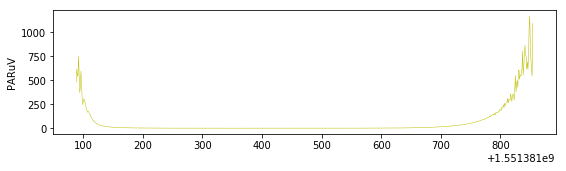

In [262]:
fig = plt.figure(1,figsize=(9,5))
### PAR
ax1 = plt.subplot(2, 1, 1)
plt.plot(xdf.satPAR_time,xdf.satPAR_PARuV,'y',linewidth=.5) 
#ax1.set_xlim([xdf.ctd_time.min().values,xdf.ctd_time.max().values])
ax1.set_ylabel('PARuV')

fig.savefig("_".join(fp.split('/')[-3:]).replace('.nc','_parSeries.png'))

Text(0.5, 24.0, 'SigmaT')

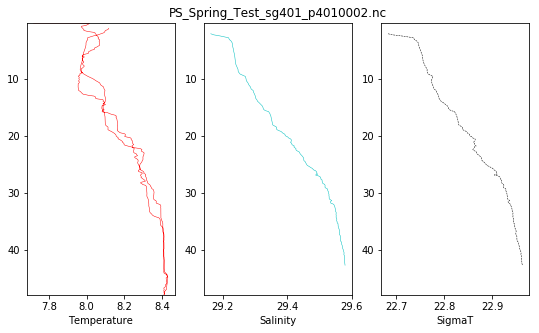

In [259]:
fig = plt.figure(1,figsize=(9,5))
### CTD Temperature
ax1 = plt.subplot(1, 3, 1)
plt.plot(xdf.temperature,xdf.ctd_depth,'r',linewidth=.5)
ax1.set_ylim([xdf.ctd_depth.min().values,xdf.ctd_depth.max().values])
ax1.invert_yaxis()
ax1.set_xlabel('Temperature')
### CTD Salinity
ax1 = plt.subplot(1, 3, 2)
plt.plot(xdf.salinity,xdf.ctd_depth,'c',linewidth=.5)
ax1.set_ylim([xdf.ctd_depth.min().values,xdf.ctd_depth.max().values])
ax1.invert_yaxis()
plt.title("_".join(fp.split('/')[-3:]))
ax1.set_xlabel('Salinity')
### CTD Density
ax1 = plt.subplot(1, 3, 3)
plt.plot(xdf.sigma_t,xdf.ctd_depth,'k--',linewidth=.5)
ax1.set_ylim([xdf.ctd_depth.min().values,xdf.ctd_depth.max().values])
ax1.invert_yaxis()
fig.savefig("_".join(fp.split('/')[-3:]).replace('.nc','_TSpro.png'))
ax1.set_xlabel('SigmaT')
